<a href="https://colab.research.google.com/github/vatturisrinivas/op_project/blob/main/Demonstration_of_Application_of_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 405ms/step - loss: 0.2340 - val_loss: 0.1124
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 193s 386ms/step - loss: 0.1114 - val_loss: 0.1073
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 386ms/step - loss: 0.1050 - val_loss: 0.1020
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


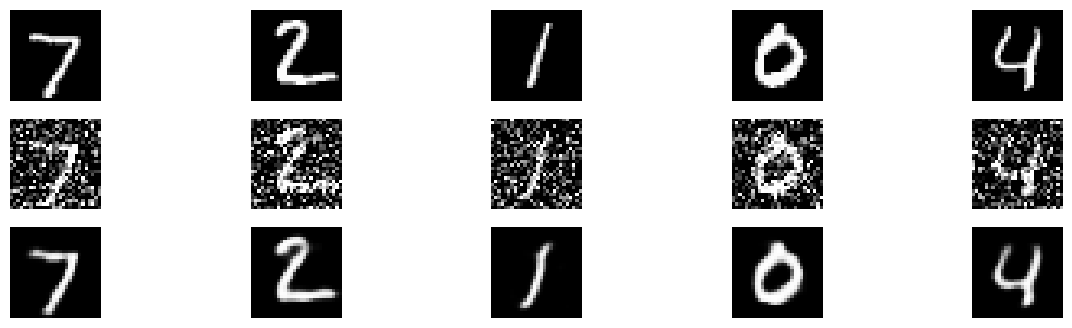

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load and normalize data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Add noise
noise = 0.5
x_train_n = np.clip(x_train + noise*np.random.randn(*x_train.shape), 0., 1.)
x_test_n = np.clip(x_test + noise*np.random.randn(*x_test.shape), 0., 1.)

# Autoencoder model
inp = layers.Input((28,28,1))
x = layers.Conv2D(32,3,activation='relu',padding='same')(inp)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32,3,activation='relu',padding='same')(x)
x = layers.UpSampling2D(2)(x)
out = layers.Conv2D(1,3,activation='sigmoid',padding='same')(x)

auto = models.Model(inp, out)
auto.compile(optimizer='adam', loss='binary_crossentropy')

# Train
auto.fit(x_train_n[...,None], x_train[...,None],
          epochs=3, batch_size=128,
          validation_data=(x_test_n[...,None], x_test[...,None]))

# Predict and show
den = auto.predict(x_test_n[...,None])
plt.figure(figsize=(15,4))
for i in range(5):
    for j, img in enumerate([x_test[i], x_test_n[i], den[i].squeeze()]):
        plt.subplot(3,5,i+1+j*5); plt.imshow(img, cmap='gray'); plt.axis('off')
plt.show()
